<a href="https://colab.research.google.com/github/sarthak-314/Book-Review-Analyzer/blob/master/Data%20Downloading%2BExploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #Download the dataset
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Books_5.json.gz

--2020-09-03 11:25:01--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Books_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7096438325 (6.6G) [application/octet-stream]
Saving to: ‘Books_5.json.gz.1’

Books_5.json.gz.1     7%[>                   ] 521.83M  42.7MB/s    eta 2m 34s ^C


In [ ]:
# %cd /content/drive/My\ Drive/Colab\ Notebooks/CADABRA/Sentiment\ Analysis/Amazon

In [ ]:
# import gzip
# import json
# data = []
# TOTAL_REVIEWS = 3000000
# num_reviews = 0
# with gzip.open('Books_5.json.gz') as f:
#     for l in f:
#         data.append(json.loads(l.strip()))
#         num_reviews += 1
#         if num_reviews > TOTAL_REVIEWS:
#             break
# # total length of list, this number equals total number of products
# print(len(data))

# # first row of the list
# print(data[0])

3000001
{'overall': 5.0, 'verified': False, 'reviewTime': '03 30, 2005', 'reviewerID': 'A1REUF3A1YCPHM', 'asin': '0001713353', 'style': {'Format:': ' Hardcover'}, 'reviewerName': 'TW Ervin II', 'reviewText': "The King, the Mice and the Cheese by Nancy Gurney is an excellent children's book.  It is one that I well remember from my own childhood and purchased for my daughter who loves it.\n\nIt is about a king who has trouble with rude mice eating his cheese. He consults his wise men and they suggest cats to chase away the mice. The cats become a nuisance, so the wise men recommend the king bring in dogs to chase the cats away.  The cycle goes on until the mice are finally brought back to chase away the elephants, brought in to chase away the lions that'd chased away the dogs.\n\nThe story ends in compromise and friendship between the mice and the king.  The story also teaches cause and effect relationships.\n\nThe pictures that accompany the story are humorous and memorable.  I was thri

In [ ]:
# # convert list into dataframe
# import pandas as pd
# df = pd.DataFrame.from_dict(data)

# print(len(df))

3000001


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%cd /content/drive/My\ Drive/Colab\ Notebooks/CADABRA/Sentiment\ Analysis/Amazon
reviews = pd.read_csv('book_reviews.csv')

/content/drive/My Drive/Colab Notebooks/CADABRA/Sentiment Analysis/Amazon


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,False,"03 30, 2005",A1REUF3A1YCPHM,0001713353,{'Format:': ' Hardcover'},TW Ervin II,"The King, the Mice and the Cheese by Nancy Gur...",A story children will love and learn from,1112140800,NaN,NaN
1,5.0,True,"06 20, 2016",AVP0HXC9FG790,0001713353,NaN,Amazon Customer,The kids loved it!,Five Stars,1466380800,NaN,NaN
2,5.0,True,"01 24, 2016",A324TTUBKTN73A,0001713353,{'Format:': ' Paperback'},Tekla Borner,My students (3 & 4 year olds) loved this book!...,Five Stars,1453593600,NaN,NaN
3,5.0,False,"07 9, 2015",A2RE7WG349NV5D,0001713353,{'Format:': ' Paperback'},Deborah K Woroniecki,LOVE IT,Five Stars,1436400000,NaN,NaN
4,5.0,True,"01 18, 2015",A32B7QIUDQCD0E,0001713353,NaN,E,Great!,Five Stars,1421539200,NaN,NaN


Finally, it works! ;)  Had to go through a lot of trouble to get the dataset

I only need summary, text and rating for BERT. I can drop the rest 

In [ ]:
reviews = reviews[['summary', 'reviewText', 'overall']]
reviews = reviews.rename({'reviewText':'text', 'overall':'rating'}, axis=1)
reviews.dropna(inplace=True)
reviews.head()

,summary,text,rating
0,A story children will love and learn from,"The King, the Mice and the Cheese by Nancy Gur...",5.0
1,Five Stars,The kids loved it!,5.0
2,Five Stars,My students (3 & 4 year olds) loved this book!...,5.0
3,Five Stars,LOVE IT,5.0
4,Five Stars,Great!,5.0


In [ ]:
reviews.rating.value_counts()

5.0    1799627
4.0     660601
3.0     296477
2.0     134051
1.0     108523
Name: rating, dtype: int64

## **Exploratory Data Analysis** 

5 random 5 star review

In [ ]:
five_star = reviews[reviews.rating==5].sample(5).text.values
for f in five_star:
    print(f)

Just got it in the post...great price, timely delivery, if it's anything like Jonathon Livingston Seagull, Illusions, or Hypnotizing Maria, can't imagine that I won't love it!
I will never in my whole life forget this book. In this book you will laugh and cry,you will hope and dream,you will appreciate life. This book is a wonder.
This was one of the better books by this author - good plot idea, great pacing and steam scenes, realistic relationships and characterization, just really well-done in almost every respect. (And kudos, again, to the author for not using the overdone jealousy theme so prevalent in the original series.) The only thing that could've made it better was extending the ending a little more (it was a too abrupt), or providing an epilogue to provide more closure for Mencheres and Kira. It wasn't enough to take away a star, though. Well done - looking forward to the next one! :)
I've read all of the Sigma Force novels and can't wait for the next installment. Rollins is

5 random 1 star reviews

In [ ]:
one_star = reviews[reviews.rating==1].sample(5).text.values
for f in one_star:
    print(f)

Truly one of the worst books I've ever read. The plot was completely implausible, the writing was so simple, hurried, and at times laughable. None of the characters were likesble. I'm
mad at myself for wasting my time reading it.

I misliked this book. Mayhaps I just misunderstood it. Or mayhaps it is just some cruel jape inflicted upon humanity by some craven god. Here is what happened:

I awoke at dawn. To break my fast, I dined on goose eggs infused with Tyroshian peppers, wild boar bacon, and a heel of black bread with honey,  along with a bowl of lard. I had some ale to wash it down. I wore a crushed velvet doublet with black lacings, along with my finest woolen breeches , dyed blue. On my shoulder I wore a half-cape made of cloth of gold interwoven with bluejay feathers.  A silk ascot upon my neck - patterned in pink paisley - completed the ensemble.

I sat at my desk in the library. A fine fire was stoked in the fireplace. Above it hung a shield, and upon it in green and blue wa

Distribution of review ratings

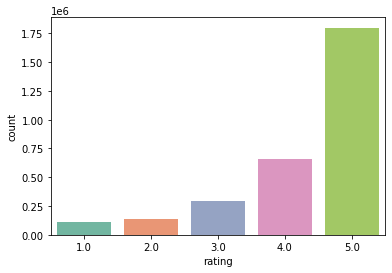

In [ ]:
_ = sns.countplot(reviews.rating, palette='Set2')

Review text length distribution

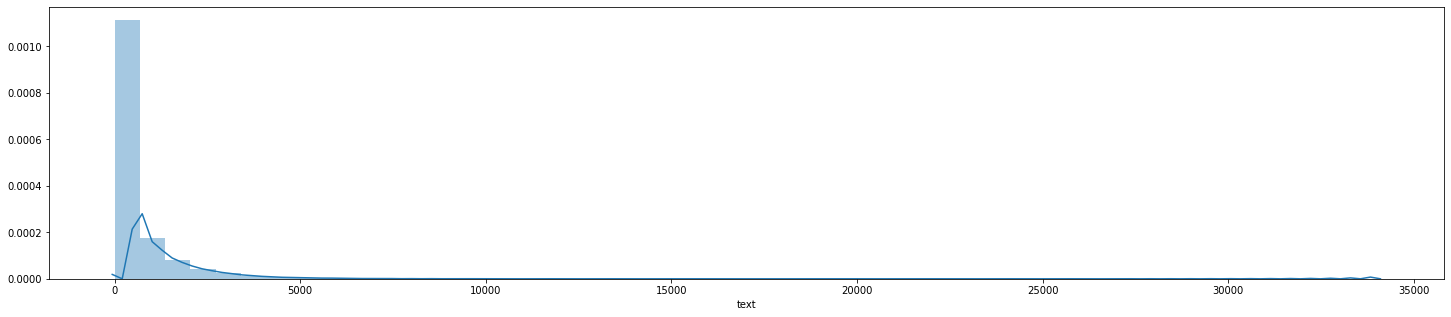

In [ ]:
plt.figure(figsize=(25, 5))
_ = sns.distplot(reviews.text.apply(len))

In [ ]:
reviews.text.apply(len).describe()

count    2.999279e+06
mean     5.935970e+02
std      9.716173e+02
min      1.000000e+00
25%      1.130000e+02
50%      2.310000e+02
75%      6.540000e+02
max      3.403100e+04
Name: text, dtype: float64

An average review has a length of 593 words with maximum review length stretching upto 34K words!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n, stop_words=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


**Top words before removing stopwords**

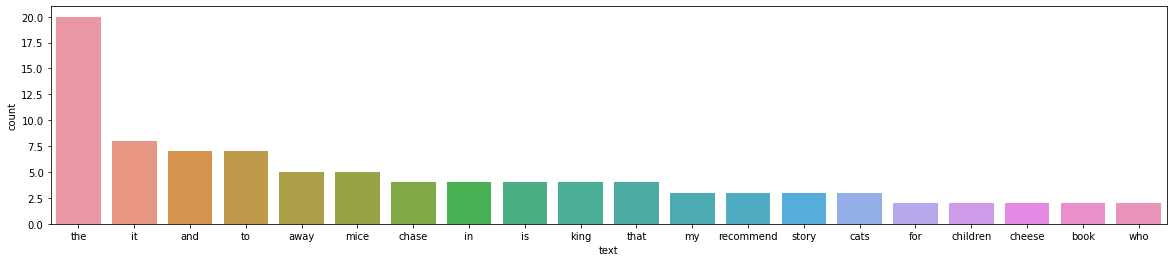

In [ ]:
#TODO: Remove .head() after reviews
common_words = get_top_n_words(reviews.head().text, 20)
df = pd.DataFrame(common_words, columns = ['text' , 'count'])
df_plot = df.groupby('text').sum()['count'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(20, 4))
_ = sns.barplot(x='text', y='count', data=df_plot)

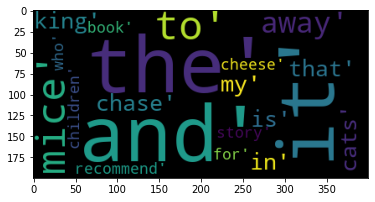

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(common_words))
_ = plt.imshow(wordcloud)

**Top words. after removing stopwords**

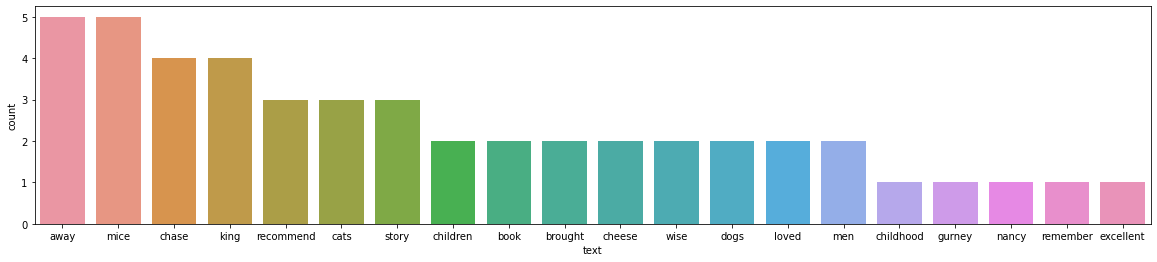

In [ ]:
#TODO: Remove .head() after reviews
common_words = get_top_n_words(reviews.head().text, 20, stop_words='english')
df = pd.DataFrame(common_words, columns = ['text' , 'count'])
df_plot = df.groupby('text').sum()['count'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(20, 4))
_ = sns.barplot(x='text', y='count', data=df_plot)

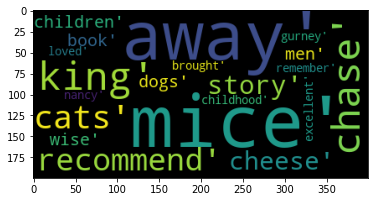

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(common_words))
_ = plt.imshow(wordcloud)

##**Data Cleaning**: Stratifying the data

todo: why stratify data?


In [ ]:
NUM_REVIEWS_PER_RATING = 100000
sampled_review = reviews.groupby('rating', group_keys=False).apply(lambda x : x.sample(min(len(x), NUM_REVIEWS_PER_RATING)))
shuffled_review = sampled_review.sample(frac=1).reset_index(drop=True)
reviews = shuffled_review
reviews.head()

,summary,text,rating
0,NOTHING PRACTICAL,doesn't really give any real practical advice....,1.0
1,Narcissists commit adultery and I just couldn'...,James Salter is a terrific writer. But after p...,2.0
2,Very disappointing,This book will apply a bible verse to every ex...,1.0
3,A Great Read!,"As usual, Diane Mott Davidson has written a no...",5.0
4,love!!!,My kids LOVE these little book packs!,5.0


In [ ]:
reviews.rating.value_counts()

3.0    100000
5.0    100000
4.0    100000
2.0    100000
1.0    100000
Name: rating, dtype: int64

Now all the ratings have equal counts. Clean?

In [ ]:
reviews.to_csv('cleaned_reviews.csv', index=False)

In [ ]:
#TODO: Make the top medium image of the projects actual project image, data has a better idea just before data section